Este colab fue desarrollado por Arnold Charry Armero.

# Política de Revisión Continua - Modelos Analíticos

En la práctica, se tienen diferentes políticas de reposición de inventarios. Una de ellas es la de revisión continua, la cual consiste en pedir una cantidad de tamaño de lote $Q^{*}$ cada vez que se sobrepase el punto de reorden $ROP$. De esta manera, se realiza un seguimiento al inventario para tenerlo controlado. Con el fin de tener suficiente nivel de inventario para tener la disponibilidad deseada para los clientes, se posee un inventario de seguridad $ss$. En la siguiente imagen se comprende mejor el concepto de punto de reorden para un inventario de seguridad determinado.

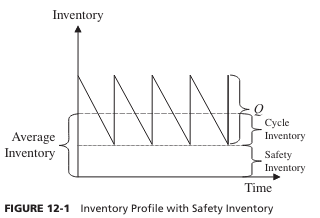


Se tienen diferentes políticas de disponibilidad para los clientes. Estas son las siguientes:

**Tasa de llenado del producto (fr):** Esta política busca satisfacer la demanda en el porcentaje $fr$ de un año. Presta atención a la cantidad de faltantes, procurando que en total sean un porcentaje menor; esto es, la proporción de demanda anual satisfecha con el inventario, sin relacionarla con el número de ciclos con faltantes (Sipper & Bulfin, 1998).

**Nivel de servicio de ciclo (CSL):** Esta política busca no tener faltantes en el porcetaje $CSL$ de número de ciclos que hay en un año. No presta atención a la cantidad de faltantes, sólo se enfoca en que no hayan en la menor proporción de ciclos; esto es, la proporción de ciclos anuales en los que no ocurren faltantes, sin importar la magnitud del faltante (Sipper & Bulfin, 1998).

**Supuestos:**

*   Existe uno o varios productos en el sistema de inventarios
*   La demanda es estocástica
*   Se permiten faltantes
*   Hay un tiempo de entrega estocástico
*   Toda la cantidad ordenada llega al mismo tiempo.


Se realizarán los ejemplos dispuestos del libro de Chopra & Meindl con código.

**Ejemplo 12-1.** Suponga que la demanda semanal de teléfonos en B&M Office Supplies se distribuye normalmente, con una
media de 2500 y una desviación estándar de 500. El fabricante tarda dos semanas en completar un pedido
colocado por el gerente de B&M. Actualmente, el gerente de la tienda pide 10 000 teléfonos cuando el inventario disponible cae a 6000. Evaluar el inventario de seguridad y el inventario promedio que lleva
B&M. Evalúe también el tiempo promedio que pasa un teléfono en B&M.

Teniendo,

$$ ss = ROP - D \times L$$

$$ \mathrm{Inventario \:de \: ciclo}= \frac{Q}{2}$$

$$ W = \frac{WIP}{D} $$

donde,

$ D = \mathrm{Tasa \:de \: demanda \: promedio} $

$ \sigma_{D } = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ ROP = \mathrm{Punto \: de \: reorden} $

$ ss = \mathrm{Inventario \:de \: seguridad} $

$ L = \mathrm{ Tiempo \: de \:entrega \: (Lead \: Time)} $

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

In [2]:
#Parámetros
D = 2500
sigma_D = 500
L = 2
ROP = 6000
Q = 10000

In [3]:
def safety_stock(ROP, D, L):
  """
  Calcula el stock de seguridad
  asumiendo normalidad

  Args:
    ROP: Punto de reorden
    D: Demanda promedio
    L: Periodo de tiempo

  Returns:
    SS: Stock de seguridad
  """
  return ROP - D * L

In [4]:
def cycle_inventory(Q):
  """
  Calcula el inventario
  en cada ciclo

  Args:
    Q: Tamaño de lote

  Returns:
    CI: Inventario de ciclo
  """
  return Q/2

In [5]:
def average_inventory(ss, CI):
  """
  Calcula el inventario
  promedio

  Args:
    ss: Stock de seguridad
    CI: Inventario de ciclo

  Returns:
    WIP: Inventario promedio
  """
  return ss + CI

In [6]:
def average_flow_time(WIP, D):
  """
  Calcula el flujo de tiempo
  promedio

  Args:
    WIP: Inventario promedio
    D: Demanda Promedio

  Returns:
    AFT: Flujo del tiempo
    promedio
  """
  return WIP / D

In [7]:
print(f"El stock de seguridad es {safety_stock(ROP, D, L)} unidades")
print(f"El inventario promedio por ciclo es {cycle_inventory(Q)} unidades")
print(f"El inventario promedio es {average_inventory(safety_stock(ROP, D, L), cycle_inventory(Q))}")
print(f"El tiempo de flujo promedio es de {average_flow_time(average_inventory(safety_stock(ROP, D, L), cycle_inventory(Q)), D)} semanas")

El stock de seguridad es 1000 unidades
El inventario promedio por ciclo es 5000.0 unidades
El inventario promedio es 6000.0
El tiempo de flujo promedio es de 2.4 semanas


**Ejemplo 12-2**. La demanda semanal de teléfonos en B&M se distribuye normalmente, con una media de 2.500 y un desviación estándar
de 500. El plazo de reposición es de dos semanas. Supongamos que la demanda es independiente de una semana a otra. Evaluar el CSL resultante de una política de pedido de 10.000
teléfonos cuando hay 6.000 teléfonos en el inventario.

Teniendo,

$$ D_{L} =  D \times L $$

$$ \sigma_{L} = \sqrt{L} \sigma_{D}$$

$$ z = \frac{ROP-D_{L}}{\sigma_{L }} $$

$$ \phi (z) = \frac{1}{\sqrt{2\pi }} \int_{-\infty}^{z} e^{\frac{-t^{2}}{2}}\:dt = CSL$$

donde,

$ D_{L} = \mathrm{Media \: de \: la \: demanda \: durante \: el \: tiempo \: de \:entrega} $

$ \sigma_{L} = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ \phi (z) = \mathrm{Función \: de \:densidad \: de \: la \: distribución \:normal} $

In [8]:
def D_L(D, L):
  """
  Demanda durante el tiempo de
  entrega

  Args:
    D: Demanda promedio
    L: Periodos

  Returns:
    D_L : Demanda durante el
    Lead Time
  """
  return D * L

In [9]:
import numpy as np

def sigma_L(sigma_D, L):
  """
  Calcula la desviación estándar
  durante el tiempo de entrega

  Args:
    sigma_D: Desviación estándar
    de la demanda
    L: Periodos

  Returns:
    sigma_L: Desviación estándar
    durante el tiempo de entrega
  """
  return np.sqrt(L) * sigma_D

In [10]:
#Parámetros
Q = 10000
ROP = 6000
L = 2
D = 2500
sigma_D = 500

In [11]:
print(f"La demanda durante el tiempo de entrega es {D_L(D, L)} unidades")
print(f"La desviación estándar durante el tiempo de entrega es {sigma_L(sigma_D, L)} unidades")

La demanda durante el tiempo de entrega es 5000 unidades
La desviación estándar durante el tiempo de entrega es 707.1067811865476 unidades


In [12]:
import scipy as sp
sp.stats.norm(D_L(D, L), sigma_L(sigma_D, L))
CSL = sp.stats.norm(D_L(D, L), sigma_L(sigma_D, L)).cdf(ROP)
print(f"La proporción de ciclos en los que no hubo faltantes es de {CSL}")

La proporción de ciclos en los que no hubo faltantes es de 0.9213503964748574


**Ejemplo 12-3**. La demanda semanal de Legos en una tienda Walmart se distribuye normalmente, con una media de 2.500 cajas.
y una desviación estándar de 500. El plazo de reabastecimiento es de dos semanas. Suponiendo una política de reabastecimiento de revisión continua, evalúe el inventario de seguridad que la tienda debe llevar para
lograr un CSL del 90 por ciento.

Teniendo,

$$ ss= \phi^{-1} (CSL) \sqrt{L} \sigma_{D}$$

donde,

$ ss = \mathrm{Inventario \:de \: seguridad} $

In [13]:
#Parámetros
D = 2500
sigma_D = 500
CSL = 0.9
L = 2

In [14]:
def safety_stock_normalized_CSL(CSL, sigma_L):
  """
  Calcula el stock de seguridad
  para una tasa de abastecimiento

  Args:
    CSL: Porcentaje de disponibilidad
    sigma_L: Desviación estándar de la
    demanda durante el tiempo de entrega

  Returns:
    ss: Stock de seguridad
  """
  import scipy.stats as st
  z = st.norm.ppf(CSL)
  return z * sigma_L

In [15]:
print(f"El inventario de seguridad para un nivel de servicio del 90% es {int(safety_stock_normalized_CSL(CSL, sigma_L(sigma_D, L)))} unidades")

El inventario de seguridad para un nivel de servicio del 90% es 906 unidades


**La escasez esperada por ciclo de reabastecimiento (ESC)** son las unidades promedio de demanda que
no están satisfechas con el inventario en seguridad por ciclo de reabastecimiento. De esta manera se define,

$$ fr = 1 - \frac{ESC}{Q}$$

$$ ESC = \int_{x = ROP}^{\infty}\left ( x - ROP \right ) f \left ( x \right ) dx $$


Cuando la demanda durante el plazo de entrega se distribuye normalmente con $D_{L}$ medio y estándar
desviación $\sigma_{L}$, dado un inventario de seguridad $ss$, presente ecuación se puede simplificar a,

$$ ESC = -ss\left [ 1 -F_{s}\left ( \frac{ss}{\sigma _{L}} \right )\right ] + \sigma _{L}  f_{s} \left ( \frac{ss}{\sigma _{L}} \right ) $$

donde,

$ F_{s} = \mathrm{Función \:de \: distribución \: acumulada \: de \: probabilidad \: normal} $

$ f_{s} = \mathrm{Función \:de \: densidad \: normal \: estandar \:no \: acumulada} $


$$ F_{s} = \phi (z) =  \int_{-\infty}^{z} \phi (t) \:dt $$

$$ f_{s} = \phi (z) = \frac{1}{\sqrt{2\pi }} \int_{-\infty}^{z} e^{\frac{-t^{2}}{2}}\:dt $$

In [16]:
def ESC(ss, sigma_L):
  """
  Calcula el nivel de faltantes
  dado un punto de reorden

  Args:
    ss: Stock de seguridad
    sigma_L: Desviación estándar
    durante el tiempo de entrega

  Returns:
    ESC: nivel de faltantes esperado
  """
  value = ss / sigma_L
  import scipy.stats as st
  st.norm(0, 1)
  z1 = st.norm(0, 1).cdf(value)
  z2 = st.norm(0, 1).pdf(value)
  #z1 = st.norm.ppf(value)
  #z2 = st.norm.ppf(value)
  return int(-ss * (1 - z1) + sigma_L * z2)

In [17]:
def fr(Q, ESC):
  """
  Calcula el nivel de demanda
  satisfecha

  Args:
    Q: Tamaño de lote
    ESC: unidades faltantes

  Returns:
    fr: Porcentaje estimado de
    demanda satisfecha
  """
  return 1 - (ESC / Q)

**Ejemplo 12-4.** Del ejemplo 12-2, recuerde que la demanda semanal de teléfonos en B&M se distribuye normalmente, con
una media de 2500 y una desviación estándar de 500. El plazo de reabastecimiento es de dos semanas.
Supongamos que la demanda es independiente de una semana a otra. Evaluar la tasa de cumplimiento resultante
de la política de pedir 10 000 teléfonos cuando hay 6000 teléfonos en inventario.

In [18]:
#Parámetros
Q = 10000
ROP = 6000
L = 2
D = 2500
sigma_D = 500
DL = D_L(D, L)
Sigma_L = sigma_L(sigma_D, L)

In [19]:
ss = safety_stock(ROP, D, L)
fal = ESC(ss, Sigma_L)
print(f"Las unidades faltantes estimadas son {fal}")

Las unidades faltantes estimadas son 25


In [20]:
print(f"La demanda satisfecha es del {100 * fr(Q, fal)}%")

La demanda satisfecha es del 99.75%


Tanto la tasa de llenado como el nivel de servicio del ciclo aumentan a medida que aumenta el inventario de seguridad. Por el mismo inventario de seguridad, un aumento en el tamaño del lote aumenta la tasa de llenado pero no el nivel de servicio del ciclo.

**Ejemplo 12-5.**  La demanda semanal de Legos en una tienda Walmart se distribuye normalmente, con una media de 2.500 cajas.
y una desviación estándar de 500. El plazo de reabastecimiento es de dos semanas. el gerente de la tienda
Actualmente encarga lotes de reposición de 10.000 cajas de Lego. Suponiendo una revisión continua
política de reabastecimiento, evaluar el inventario de seguridad que la tienda debe tener para lograr una tasa de llenado de
97,5 por ciento.

Teniendo,

$$ ESC = (1 - fr) \:Q$$

In [21]:
#Parámetros
D = 2500
sigma_D = 500
fr = 0.975
L = 2
Q = 10000

In [22]:
def ESC_with_fr(Q, fr):
  """
  Calcula el nivel de
  faltantes de acuerdo a la
  tasa de llenado escogida

  Args:
    Q: Cantidad de lote
    fr: tasa de llenado

  Returns:
    ESC: nivel de faltantes
  """
  return int((1 - fr) * Q)

In [23]:
ESC_value = ESC_with_fr(Q, fr)
print(f"El nivel de faltantes esperado es de {ESC_value}")

El nivel de faltantes esperado es de 250


Se despeja el inventario de seguridad $ss$,

In [24]:
import numpy as np
import scipy.optimize as opt

Sigma_L = sigma_L(sigma_D, L)
def f(ss):
  value = ss / Sigma_L
  import scipy.stats as st
  st.norm(0, 1)
  z1 = st.norm(0, 1).cdf(value)
  z2 = st.norm(0, 1).pdf(value)
  return (-ss * (1 - z1) + Sigma_L * z2) - ESC_value

r = opt.root(f, x0=ss, method='hybr')
ss = r.x[0]
print(f"El inventario de seguridad debe ser de {round(ss)} unidades")

El inventario de seguridad debe ser de 67 unidades


**Ejemplo 12-6**. La demanda semanal de camisas blancas en una tienda Target se distribuye normalmente, con una media de 2500
y una desviación estándar de 800. El plazo de reabastecimiento del proveedor actual es nueve
semanas. El gerente de la tienda aspira a un nivel de servicio de ciclo del 95 por ciento. ¿Qué ahorro en
inventario de seguridad puede esperar la tienda si el proveedor reduce el tiempo de entrega a una semana? ¿Qué ahorros en
el inventario de seguridad puede esperar la tienda si la reducción de la incertidumbre de la demanda da como resultado una desviación estándar de la demanda de 400?

In [25]:
#Parámetros
D = 2500
sigma_D1 = 800
sigma_D2 = 400
L1 = 9
L2 = 1
CSL = 0.95

In [26]:
Sigma_L1 = sigma_L(sigma_D1, L1)
Sigma_L2 = sigma_L(sigma_D1, L2)

In [27]:
ss1 = safety_stock_normalized_CSL(CSL, Sigma_L1)
ss2 = safety_stock_normalized_CSL(CSL, Sigma_L2)
print(f"El inventario de seguridad para un nivel de servicio del 95% con tiempo de entrega de 9 semanas es de {round(ss1)} unidades")
print(f"El inventario de seguridad para un nivel de servicio del 95% con tiempo de entrega de 1 semana es de {round(ss2)} unidades")

El inventario de seguridad para un nivel de servicio del 95% con tiempo de entrega de 9 semanas es de 3948 unidades
El inventario de seguridad para un nivel de servicio del 95% con tiempo de entrega de 1 semana es de 1316 unidades


In [28]:
Sigma_L3 = sigma_L(sigma_D2, L1)

In [29]:
ss3 = safety_stock_normalized_CSL(CSL, Sigma_L3)
print(f"El inventario de seguridad para un nivel de servicio del 95% con una desviación estándar de 400 unidades es de {round(ss3)} unidades")

El inventario de seguridad para un nivel de servicio del 95% con una desviación estándar de 400 unidades es de 1974 unidades


**Ejemplo 12-7**. La demanda diaria de tabletas en Amazon se distribuye normalmente, con una media de 2.500 y una desviación estándar
 de 500. El proveedor de tabletas tarda un promedio de L = 7 días en reponer el inventario al
Amazon. Amazon tiene como objetivo un CSL del 90 por ciento (proporcionando una tasa de cumplimiento cercana al 100 por ciento) para
su inventario de tabletas. Evalúe el inventario de seguridad de tabletas que Amazon debe tener si la desviación estándar del plazo de entrega es de siete días. Amazon está trabajando con el proveedor para reducir el
desviación estándar a cero. Evaluar la reducción en el inventario de seguridad que Amazon puede esperar como
resultado de esta iniciativa

Teniendo,

$$ D_{L} = D \times L $$

$$ \sigma_{L}=\sqrt{L\sigma^{2}_{D}+D^{2}s_{L}^{2}} $$

donde,

$ D = \mathrm{Tasa \:de \: demanda \: promedio} $

$ \sigma_{D } = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ D_{L} = \mathrm{Media \: de \: la \: demanda \: durante \: el \: tiempo \: de \:entrega} $

$ \sigma_{L} = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ L = \mathrm{Media \:de \: tiempo \: de \: entrega} $

$ s_{L} = \mathrm{Desviación \: estándar \:de \: tiempo \: de \: entrega} $


In [30]:
#Parámetros
D = 2500
sigma_D = 500
L = 7
sL = 7
CSL = 0.9

In [31]:
def sigma_L(L, sigma_D, D, sL):
  """
  Calcula la desviación estándar
  durante el tiempo de entrega
  incluyendo la variabiliad del
  proveedor

  Args:
    L: Lead time promedio de
    entrega
    sigma_D: Desviación estándar
    de la demanda
    D: Demanda promedio
    sL: Desviación estándar del
    tiempo de entrega

  Returns
    sigma_L: Desviación estándar
    durante el tiempo de entrega
  """
  import numpy as np
  return np.sqrt(L * sigma_D**2 + D**2 * sL**2)

In [32]:
Demand = D_L(D, L)
print(f"La demanda durante el tiempo de entrega es {Demand} unidades")

La demanda durante el tiempo de entrega es 17500 unidades


In [33]:
Sigma_L = round(sigma_L(L, sigma_D, D, sL))
print(f"La desviación estándar durante el tiempo de entrega es {Sigma_L} unidades")

La desviación estándar durante el tiempo de entrega es 17550 unidades


In [34]:
#Inventario de Seguridad
ss = safety_stock_normalized_CSL(CSL, Sigma_L)
print(f"El inventario de seguridad es de {round(ss)} unidades")

El inventario de seguridad es de 22491 unidades


Ahora para tener cero variabilidad con el proveedor,

In [35]:
Sigma_L = round(sigma_L(L, sigma_D, D, 0))
print(f"La desviación estándar durante el tiempo de entrega es {Sigma_L} unidades")

La desviación estándar durante el tiempo de entrega es 1323 unidades


In [36]:
#Inventario de Seguridad
ss = safety_stock_normalized_CSL(CSL, Sigma_L)
print(f"El inventario de seguridad es de {round(ss)} unidades")

El inventario de seguridad es de 1695 unidades


### Referencias
*   Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Pulido, H. G. (2007). Control estadístico de calidad y Seis Sigma.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).